In [815]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

warnings.filterwarnings('ignore')
sns.set()

# Obtendo dados

In [816]:
!curl https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv -o train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.4M  100 19.4M    0     0  19.9M      0 --:--:-- --:--:-- --:--:-- 19.9M


In [817]:
# Importando dados e já configurando a data e os IDs como String
df = pd.read_csv('train.csv', dtype={'date': object,
                                     'fullVisitorId': object,
                                     'visitId': object})

In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  object
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


# Tratando features

## Convertendo conteúdo JSON em features

In [819]:
df.head().T

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Affiliates,Organic Search,Organic Search
date,20160902,20160902,20160902,20160902,20160902
device,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""browser"": ""Safari"", ""browserVersion"": ""not a...","{""browser"": ""Safari"", ""browserVersion"": ""not a..."
fullVisitorId,9674781571160116268,8590648239310839049,9772828344252850532,1350700416054916432,1350700416054916432
geoNetwork,"{""continent"": ""Asia"", ""subContinent"": ""Southea...","{""continent"": ""Europe"", ""subContinent"": ""Easte...","{""continent"": ""Americas"", ""subContinent"": ""Sou...","{""continent"": ""Americas"", ""subContinent"": ""Nor...","{""continent"": ""Americas"", ""subContinent"": ""Nor..."
sessionId,9674781571160116268_1472804607,8590648239310839049_1472835928,9772828344252850532_1472856802,1350700416054916432_1472879649,1350700416054916432_1472829671
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
totals,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",..."
trafficSource,"{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
visitId,1472804607,1472835928,1472856802,1472879649,1472829671


In [820]:
# Separando as features que contem json em colunas
dicionarios = ['device','geoNetwork','trafficSource','totals']

for feature in dicionarios:
    df = df.join(
        pd.DataFrame([json.loads(obs) for obs in df[feature]])
    )

df.drop(dicionarios, axis = 1, inplace = True)

In [821]:
df.head().T

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Affiliates,Organic Search,Organic Search
date,20160902,20160902,20160902,20160902,20160902
fullVisitorId,9674781571160116268,8590648239310839049,9772828344252850532,1350700416054916432,1350700416054916432
sessionId,9674781571160116268_1472804607,8590648239310839049_1472835928,9772828344252850532_1472856802,1350700416054916432_1472879649,1350700416054916432_1472829671
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1472804607,1472835928,1472856802,1472879649,1472829671
visitNumber,1,1,1,2,1
visitStartTime,1472804607,1472835928,1472856802,1472879649,1472829671
browser,Chrome,Chrome,Chrome,Safari,Safari
browserVersion,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


## Removendo features não relevantes

In [822]:
# Feature categorizada como dict com apenas um valor
df.drop('adwordsClickInfo', axis=1, inplace = True)

In [823]:
# Removendo features que possuem apenas 1 valor único
feature_nao_relevante = [i for i in df.columns if len(df[i].unique()) == 1]
df.drop(feature_nao_relevante, axis = 1, inplace = True)

## DF resultante

In [824]:
# Verificando quantos valores únicos possuímos por feature
for coluna in df.columns:
    print(coluna + ': ' + str(len(df[coluna].unique())))

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
operatingSystem: 12
isMobile: 2
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
networkDomain: 1747
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [825]:
df.shape

(12283, 31)

## Features quantitativas

**bounces:** a rejeição é calculada especificamente como uma sessão que aciona uma solicitação única ao servidor. Isso ocorre, por exemplo, quando um usuário abre uma única página do seu website e, em seguida, asi sem acionar outras solicitações ao servidor durante essa sessão.

**hits:** uma interação que resulta no envio de dados ao Analytics. Os tipos comuns de hit incluem hits de: acompanhamento de página, acompanhamento de eventos e comércio eletrônico.

**newVisits:** número total de novos usuários na sessão. Na primeira visita o valor será 1. Nas demais, ele será nulo.

**pageviews:** uma instância de uma ágina carregada/atualizada em um navegador.

**transactionRevenue:** valor de venda (multiplicado por 1000000)

In [826]:
quantitativa = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [827]:
df[quantitativa].dtypes

bounces               object
hits                  object
newVisits             object
pageviews             object
transactionRevenue    object
dtype: object

In [828]:
# Convertendo para numérico
for f in quantitativa:
  df[f] = pd.to_numeric(df[f])

In [829]:
df[quantitativa].dtypes

bounces               float64
hits                    int64
newVisits             float64
pageviews               int64
transactionRevenue    float64
dtype: object

### transactionRevenue

In [830]:
print('-> Feature "transactionRevenue"')
print()
print(f'Quantidade de nulos: { df.transactionRevenue.isna().sum() }')
print(f'Quantidade de total: { df.shape[0] }')
print(f'% de nulos: { (df.transactionRevenue.isna().sum() / df.shape[0] * 100).round(2) }')
print()
print(f'Valor mínimo: { df.transactionRevenue.min() }')
print(f'Valor máximo: { df.transactionRevenue.max() }')

-> Feature "transactionRevenue"

Quantidade de nulos: 12119
Quantidade de total: 12283
% de nulos: 98.66

Valor mínimo: 90000.0
Valor máximo: 755630000.0


In [831]:
# Substituindo os valores nulos por zero
df.transactionRevenue.fillna(value = 0, inplace = True)

# Retirando a escala de 1.000.000
df.transactionRevenue = df.transactionRevenue / 1000000

# Criando uma primeira versão do modelo

In [832]:
print(f'Quantidade de usuários distintos: {len(set(df.fullVisitorId))}')

Quantidade de usuários distintos: 9997


In [833]:
df_quantitativo = df.groupby('fullVisitorId', as_index = False)[quantitativa].sum()

In [834]:
df_quantitativo.head().T

,0,1,2,3,4
fullVisitorId,0002365800130207040,0010286039787739137,0011056874471185769,0014443856125569702,0017260116665815114
bounces,1,0,0,1,0
hits,1,4,2,1,2
newVisits,1,1,1,1,0
pageviews,1,3,2,1,2
transactionRevenue,0,0,0,0,0


## Modelagem

### Criando o modelo

In [835]:
y = df_quantitativo.transactionRevenue.copy()
x = df_quantitativo.drop('transactionRevenue', axis = 1)

In [836]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42)
print(f'x_train: { x_train.shape }')
print(f'x_test : { x_test.shape }')
print(f'y_train: { y_train.shape }')
print(f'y_test: { y_test.shape }')

x_train: (6997, 5)
x_test : (3000, 5)
y_train: (6997,)
y_test: (3000,)


In [837]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

### Avaliando os resultados

In [838]:
resultados = pd.DataFrame({
    'revenue': y_test,
    'predict': y_pred
})

In [839]:
resultados['erro'] = resultados.predict - resultados.revenue

In [840]:
resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [841]:
resultados.query('revenue > 0').head(10)

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


In [842]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

28.412073660366516

In [843]:
STD = np.std(df_quantitativo.transactionRevenue)
STD

25.129905708017944

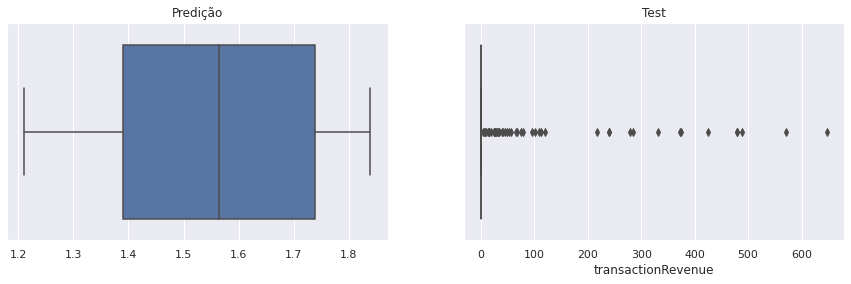

In [844]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

sns.boxplot(y_pred, ax=ax[0])
ax[0].set_title("Predição")
sns.boxplot(y_test, ax=ax[1])
ax[1].set_title("Test")
plt.ioff()

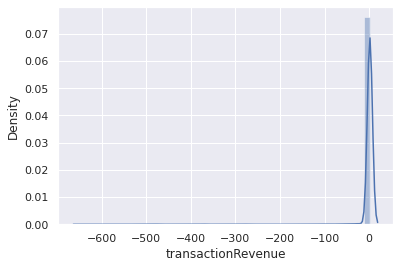

In [845]:
sns.distplot(y_pred - y_test)
plt.ioff()

# Criando segunda versão do modelo

Vamos trabalhar apenas com os detalhes da última visita ao site

## Máxima quantidade de visitas

In [846]:
df_visitas_ultima = df.groupby('fullVisitorId', as_index = False)['visitNumber'].max()

In [847]:
df_visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


## Usuários únicos

In [848]:
df_usuarios_unicos = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])

In [849]:
df_usuarios_unicos.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [850]:
df_usuarios_unicos.shape

(12270, 31)

## Primeira Visita

In [851]:
df_visitas_primeira = df.groupby('fullVisitorId')['visitNumber'].min()

In [852]:
df_visitas_primeira.head()

fullVisitorId
0002365800130207040    1
0010286039787739137    1
0011056874471185769    1
0014443856125569702    1
0017260116665815114    6
Name: visitNumber, dtype: int64

## Visitas

In [853]:
df_visitas = pd.merge(df_visitas_ultima, df_usuarios_unicos, 
                      left_on = ['fullVisitorId', 'visitNumber'],
                      right_on = ['fullVisitorId', 'visitNumber'],
                      how = 'left')

In [854]:
df_visitas.head().T

,0,1,2,3,4
fullVisitorId,0002365800130207040,0010286039787739137,0011056874471185769,0014443856125569702,0017260116665815114
visitNumber,1,1,1,1,6
channelGrouping,Social,Organic Search,Social,Social,Direct
date,20160904,20160928,20161205,20161002,20170420
sessionId,0002365800130207040_1472974804,0010286039787739137_1475084026,0011056874471185769_1480996024,0014443856125569702_1475423502,0017260116665815114_1492707286
visitId,1472974804,1475084026,1480996024,1475423502,1492707286
visitStartTime,1472974804,1475084026,1480996024,1475423502,1492707286
browser,Edge,Chrome,Chrome,Opera,Safari
operatingSystem,Windows,Chrome OS,Windows,Windows,Macintosh
isMobile,False,False,False,False,False


In [855]:
df_visitas = df_visitas.join(df_visitas_primeira, how='left', on='fullVisitorId', rsuffix = '_primeira')

In [856]:
df_visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [857]:
df_visitas = pd.merge(df_visitas, df_usuarios_unicos, 
                      left_on = ['fullVisitorId', 'visitNumber_primeira'],
                      right_on = ['fullVisitorId', 'visitNumber'],
                      how = 'left',
                      suffixes=['_ultima', '_primeira'])

In [858]:
df_visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,hits_ultima,pageviews_ultima,bounces_ultima,newVisits_ultima,transactionRevenue_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not a

In [859]:
for coluna in quantitativa:
  excl = [coluna + '_primeira', coluna + '_ultima']
  print(excl)
  df_visitas.drop(excl, axis = 1, inplace=True)

['bounces_primeira', 'bounces_ultima']
['hits_primeira', 'hits_ultima']
['newVisits_primeira', 'newVisits_ultima']
['pageviews_primeira', 'pageviews_ultima']
['transactionRevenue_primeira', 'transactionRevenue_ultima']


In [860]:
for c in df_visitas.columns: 
  if c.count('Id') == 1 and (c.endswith('_primeira') or c.endswith('_ultima')):
    print(c)
    df_visitas.drop(c, axis = 1, inplace = True)

sessionId_ultima
visitId_ultima
sessionId_primeira
visitId_primeira


In [861]:
df_visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'continent_primeira',
       'subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'city_primeira', 'networkDomain_primeira',
       'campaign_primeira', 'source_primeira', 'mediu

In [862]:
geo = ['city_primeira', 'continent_primeira', 'subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'networkDomain_primeira']
df_visitas.drop(geo, axis = 1, inplace = True)

In [863]:
df_visitas = pd.merge(df_visitas, df_quantitativo, 
                      left_on = ['fullVisitorId'],
                      right_on = ['fullVisitorId'],
                      how = 'left')

In [864]:
df_visitas['tempo_dif'] = df_visitas.visitStartTime_ultima - df_visitas.visitStartTime_primeira

In [865]:
df_visitas['visits'] = df.groupby('fullVisitorId', as_index=False).count().visitNumber.values

In [866]:
df_visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in df_visitas.date_ultima])
df_visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in df_visitas.date_ultima])
df_visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in df_visitas.date_ultima])

df_visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in df_visitas.date_primeira])
df_visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in df_visitas.date_primeira])
df_visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in df_visitas.date_primeira])

In [867]:
df_visitas.shape

(9997, 54)

In [868]:
df_visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1,2017,4,20,2017,4,20


In [869]:
df_visitas.drop('fullVisitorId', axis = 1, inplace = True)

## Modelagem

In [870]:
y = df_visitas.transactionRevenue.copy()
x = df_visitas.drop('transactionRevenue', axis=1)

In [871]:
qualitativas = df_visitas.dtypes[df_visitas.dtypes == object].keys()
qualitativas

Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'deviceCategory_ultima', 'continent_ultima',
       'subContinent_ultima', 'country_ultima', 'region_ultima',
       'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'channelGrouping_primeira', 'date_primeira',
       'browser_primeira', 'operatingSystem_primeira',
       'deviceCategory_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'keyword_primeira', 'isTrueDirect_primeira',
       'referralPath_primeira', 'adContent_primeira', 'campaignCode_primeira'],
      dtype='object')

In [872]:
for feature in qualitativas:
  encoder = LabelEncoder()
  encoder.fit(list(x[feature].values.astype('str')))
  x[feature] = encoder.transform(list(x[feature].values.astype('str')))

In [873]:
x.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,81,1,174,11,1,1,7,34,1,1472974804,7,9,False,0,0,72,6,80,1,174,10,1,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,4,1,192,11,1,1,4,58,1,1475084026,5,3,False,0,0,20,5,4,1,192,10,1,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,81,1,124,11,1,1,7,126,1,1480996024,5,9,False,0,0,72,6,80,1,124,10,1,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,81,1,173,11,1,1,7,62,1,1475423502,15,9,False,0,0,72,6,80,1,173,10,1,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,81,0,192,11,1,6,2,262,6,1492707286,18,6,False,0,0,0,0,80,0,192,10,1,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


In [874]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42)
print(f'x_train: { x_train.shape }')
print(f'x_test : { x_test.shape }')
print(f'y_train: { y_train.shape }')
print(f'y_test: { y_test.shape }')

x_train: (6997, 52)
x_test : (3000, 52)
y_train: (6997,)
y_test: (3000,)


In [875]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [876]:
y_pred[y_pred < 0] = 0

## Avaliando o modelo

In [877]:
resultados = pd.DataFrame({
    'revenue': y_test,
    'predict': y_pred
})
resultados['erro'] = resultados.predict - resultados.revenue

In [878]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.000000,0.000000
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.247513,0.247513
6391,0.0,0.000000,0.000000


In [879]:
resultados.query('revenue > 0')

,revenue,predict,erro
3006,32.49,14.464323,-18.025677
5928,74.85,36.179521,-38.670479
8361,424.50,18.263302,-406.236698
8612,55.99,16.243607,-39.746393
416,15.19,22.472985,7.282985
4077,5.97,15.058227,9.088227
8146,27.19,13.376883,-13.813117
4908,372.65,129.416836,-243.233164
9395,29.98,20.508505,-9.471495
8728,101.95,88.954637,-12.995363


In [880]:
np.sqrt(mean_squared_error(y_test, y_pred))

25.02188996701886

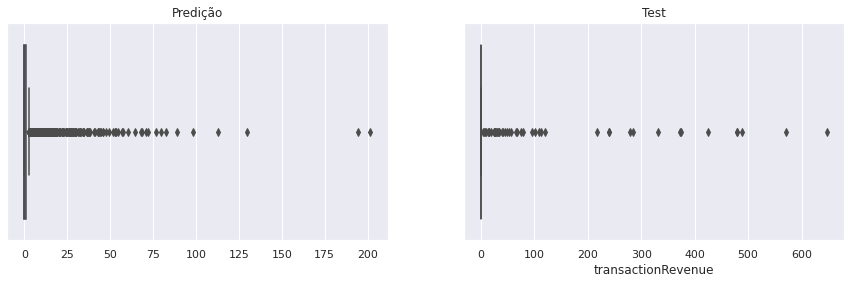

In [881]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

sns.boxplot(y_pred, ax=ax[0])
ax[0].set_title("Predição")
sns.boxplot(y_test, ax=ax[1])
ax[1].set_title("Test")
plt.ioff()

## Mudando o algoritmo

In [882]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
y_pred[y_pred < 0] = 0

In [883]:
resultados = pd.DataFrame({
    'revenue': y_test,
    'predict': y_pred
})
resultados['erro'] = resultados.predict - resultados.revenue

In [884]:
resultados.query('revenue > 0')

,revenue,predict,erro
3006,32.49,45.327855,12.837855
5928,74.85,0.000000,-74.850000
8361,424.50,35.719843,-388.780157
8612,55.99,21.127794,-34.862206
416,15.19,17.601136,2.411136
4077,5.97,9.941365,3.971365
8146,27.19,25.886259,-1.303741
4908,372.65,50.353001,-322.296999
9395,29.98,16.879785,-13.100215
8728,101.95,177.071616,75.121616


In [885]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.09413632899293